In [1]:
#!/usr/bin/env python
# coding: utf-8

import argparse
import monai

from params.VSparams import VSparams

def create_mask(model_path,n=1,t="T1"):
    # read parsed arguments
    parser = argparse.ArgumentParser(description="Train the model")

    # initialize parameters
    p = VSparams(parser)
    
    train_files, val_files, test_files = p.load_samples(n,t)

    # define the transforms
    train_transforms, val_transforms, test_transforms = p.get_transforms()
    
    # Set deterministic training for reproducibility
    monai.utils.set_determinism(seed=0)
    
    # cache and load validation data
    test_loader = p.cache_transformed_test_data(test_files, test_transforms)
    
    # create UNet
    model = p.set_and_get_model()
    
    # load the trained state of the model
    model.load_state_dict(torch.load(os.path.join(, model_path)))
    
    # run inference and create figures in figures folder
    model.eval()  # activate evaluation mode of model

    model_segmentation = model
    final_outputs = []
    with torch.no_grad():  # turns off PyTorch's auto grad for better performance
    for i, data in enumerate(test_loader):

        outputs = sliding_window_inference(
            inputs=data["image"].to(self.device),
            roi_size=self.sliding_window_inferer_roi_size,
            sw_batch_size=1,
            predictor=model_segmentation,
            mode="gaussian",
        )

        full_outputs.append(outputs)


    return full_outputs


monai.config.print_config()
mask = create_mask("/projectnb/cs585bp/students/econlin/VS_Seg-master/MODEL/best_metric_model.pth")











SyntaxError: invalid syntax (3840997287.py, line 31)

In [ ]:
import importlib.util
import sys

# Specify the path to the script
script_path = "VS_inference.py"

# Create a module spec
spec = importlib.util.spec_from_file_location("script_module", script_path)
# Create a module based on the spec
script_module = importlib.util.module_from_spec(spec)
# Add the module to sys.modules
sys.modules["script_module"] = script_module
# Execute the module
spec.loader.exec_module(script_module)

# Now you can access variables from the script
result_variable = script_module.your_variable_name

In [52]:
import pickle

with open("results.pkl","rb") as f:
    original = pickle.load(f)


In [61]:
import matplotlib.pyplot as plt
import numpy as np

import numpy as np

def get_safe_bounds(c,margin,axis):
    if c-margin<0:
        indices = (0,96)
    elif c+margin > axis-1:
        indices = (axis-97,axis-1)
    else:
        indices = (c-48,c+48)

    return indices


def extract_patch(volume, center, margin=48):
    """
    Extract a 96x96x96 patch centered at (x, y, z) from a 3D volume.
    Pads with zeros if the patch goes out of bounds.
    
    Args:
        volume (np.ndarray): 3D array with shape (Z, Y, X)
        center (tuple): (x, y, z) center coordinate

    Returns:
        np.ndarray: Patch of shape (96, 96, 96)
    """
    x_max,y_max,z_max = volume.shape
    
    x,y,z = center

    (x1,x2) = get_safe_bounds(x,margin,x_max)
    (y1,y2) = get_safe_bounds(y,margin,y_max)
    (z1,z2) = get_safe_bounds(z,margin,z_max)

    bounds = ((x1,x2),(y1,y2),(z1,z2))
    return (volume[y1:y2,x1:x2,z1:x2],bounds)
results = original[0].cpu().numpy()
c = results[0,1]
c[c<0]=0

max_slice_idx = np.argmax(np.sum(c,axis=(0,1)),axis=-1)
max_slice = c[:,:,max_slice_idx]

max_idx = np.argmax(max_slice)

# Convert flat index to 2D coordinates (row, column)
y, x = np.unravel_index(max_idx, max_slice.shape)

patch,bounds = extract_patch(results[0,0],(x,y,max_slice_idx))

data_bounds[i] = bounds

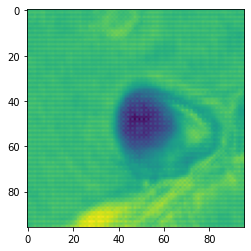

In [62]:
plt.imshow(test[:,:,max_slice_idx])

In [26]:
import nibabel as nib

def read_nifti_file(file_path):
    """
    Custom function to read NIfTI files since monai.data.read_nifti is not available in MONAI 0.4.0
    
    Args:
        file_path: Path to the NIfTI file
        
    Returns:
        numpy array containing the data
    """
    nifti_img = nib.load(file_path)
    return nifti_img.get_fdata()

In [13]:
file_path = "/projectnb/cs585bp/students/econlin/VS_Seg-master/t2_masks/0_509_510_119_mask.nii.gz"

results = read_nifti_file(file_path)

In [23]:
import pickle

with open("data_bounds.pkl","rb") as f:
    r = pickle.load(f)

In [25]:
import SimpleITK as sitk

ModuleNotFoundError: No module named 'SimpleITK'

In [34]:
import pickle

with open("results.pkl","rb") as f:
    r = pickle.load(f)



patient_mask = r[0].cpu().numpy()
                
c = patient_mask[0]
c[c<0]=0
max_slice_idx = np.argmax(np.sum(c,axis=(0,1)),axis=-1)
max_slice = c[:,:,max_slice_idx]

max_idx = np.argmax(max_slice)

# Convert flat index to 2D coordinates (row, column)
y, x = np.unravel_index(max_idx, max_slice.shape)

patch = extract_patch(c,x,y,max_slice_idx)

ValueError: too many values to unpack (expected 2)

/projectnb/cs585bp/students/econlin/.conda/envs/shapey/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/projectnb/cs585bp/students/econlin/.conda/envs/shapey/lib/python3.6/site-packages/torch/cuda/__init__.py:143: UserWarning: 
NVIDIA L40S with CUDA capability sm_89 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the NVIDIA L40S GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


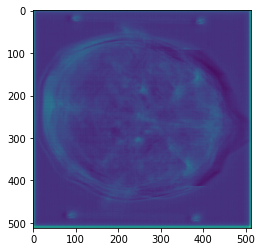

In [23]:
import matplotlib.pyplot as plt
import numpy as np
b = r[0].cpu().numpy()
avg = np.mean(b[0,0],axis=-1)
plt.imshow(avg)

NameError: name 'nn' is not defined

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm
import monai
from monai.networks.nets import SwinUNETR
from monai.metrics import DiceMetric
from monai.losses import DiceCELoss
from monai.data import (
    decollate_batch,
    CacheDataset,
    list_data_collate,
)
from monai.transforms import (
    AsDiscrete,
    Compose,
    LoadImaged,
    EnsureChannelFirstd,
    ScaleIntensityd,
    EnsureTyped,
    Orientationd,
    Spacingd,
    ConcatItemsd,
    SaveImaged,
    Invertd,
    SpatialPadd
)

import torch.nn.functional as F
from monai.networks.utils import one_hot

class HardnessWeightedDiceLoss(nn.Module):
    def __init__(self, smooth=1e-5, hardness_lambda=0.6, num_classes=2):
        super().__init__()
        self.smooth = smooth
        self.hardness_lambda = hardness_lambda
        self.num_classes = num_classes

    def forward(self, input, target):
        probs = F.softmax(input, dim=1)
        target_oh = one_hot(target, num_classes=self.num_classes)

        hardness_weight = self.hardness_lambda * torch.abs(probs - target_oh) + (1.0 - self.hardness_lambda)

        intersection = (hardness_weight * probs * target_oh).sum(dim=(2, 3, 4))
        union = (hardness_weight * (probs + target_oh)).sum(dim=(2, 3, 4))

        dice_score = (2.0 * intersection + self.smooth) / (union + self.smooth)
        dice_loss = 1.0 - dice_score.mean()

        return dice_loss

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set paths for your data
# Set paths for your data
t1_dir = "/projectnb/cs585bp/students/econlin/VS_Seg-master/t1_masks"
t2_dir = "/projectnb/cs585bp/students/econlin/VS_Seg-master/t2_masks"
labels_dir = "/projectnb/cs585bp/students/econlin/VS_Seg-master/label_masks"
output_dir = "./output"

os.makedirs(output_dir, exist_ok=True)

# Create data dictionaries for MONAI
def create_data_dicts(t1_dir, t2_dir, labels_dir):
    t1_files = sorted([os.path.join(t1_dir, f) for f in os.listdir(t1_dir) if f.endswith('.nii.gz')])
    t2_files = sorted([os.path.join(t2_dir, f) for f in os.listdir(t2_dir) if f.endswith('.nii.gz')])
    label_files = sorted([os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith('.nii.gz')])
    
    # Ensure consistent file counts
    assert len(t1_files) == len(t2_files) == len(label_files), "Mismatch in file counts"
    
    data_dicts = [
        {
            "t1": t1_file,
            "t2": t2_file,
            "label": label_file
        }
        for t1_file, t2_file, label_file in zip(t1_files, t2_files, label_files)
    ]
    return data_dicts

def create_data_streams(base_folder,prefix):
  test_folders = [prefix+"_"+f for f in ['t1_masks','t2_masks','label_masks']]
  test_paths = [os.path.join(base_folder, f) for f in test_folders]
  test_dict = create_data_dicts(test_paths[0],test_paths[1],test_paths[2])
  return test_dict

def create_data_split(base_folder):
  train_dict = create_data_streams(base_folder,'train')
  val_dict = create_data_streams(base_folder,'val')
  test_dict = create_data_streams(base_folder,'test')
  return train_dict,val_dict,test_dict

# Define transforms for NIfTI files
train_transforms = Compose([
    LoadImaged(keys=["t1", "t2", "label"]),  # Load NIfTI files
    EnsureChannelFirstd(keys=["t1", "t2", "label"]),
    Orientationd(keys=["t1", "t2", "label"], axcodes="RAS"),  # Standardize orientation
    Spacingd(keys=["t1", "t2", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "bilinear", "nearest")),
    SpatialPadd(keys=["t1", "t2", "label"], spatial_size=(96, 96, 96), mode=("constant", "constant", "constant")),
    ScaleIntensityd(keys=["t1", "t2"]),
    ConcatItemsd(keys=["t1", "t2"], name="image", dim=0),  # Concatenate T1 and T2 along channel dimension
    EnsureTyped(keys=["image", "label"]),
])

val_transforms = Compose([
    LoadImaged(keys=["t1", "t2", "label"]),  # Load NIfTI files
    EnsureChannelFirstd(keys=["t1", "t2", "label"]),
    Orientationd(keys=["t1", "t2", "label"], axcodes="RAS"),  # Standardize orientation
    Spacingd(keys=["t1", "t2", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "bilinear", "nearest")),
    SpatialPadd(keys=["t1", "t2", "label"], spatial_size=(96, 96, 96), mode=("constant", "constant", "constant")),
    ScaleIntensityd(keys=["t1", "t2"]),
    ConcatItemsd(keys=["t1", "t2"], name="image", dim=0),  # Concatenate T1 and T2 along channel dimension
    EnsureTyped(keys=["image", "label"]),
])

# Split dataset into training and validation
def train_val_split(data_dicts, val_ratio=0.2):
    n_val = int(len(data_dicts) * val_ratio)
    n_train = len(data_dicts) - n_val
    
    train_files = data_dicts[:n_train]
    val_files = data_dicts[n_train:]
    
    return train_files, val_files

# Create dataset and dataloaders
base_folder = "/projectnb/cs585bp/students/econlin/VS_Seg-master"
train_files,val_files,test_files = create_data_split(base_folder)

# Using CacheDataset for better performance
train_ds = CacheDataset(data=train_files, transform=train_transforms, cache_rate=1.0, num_workers=4)
val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_rate=1.0, num_workers=4)

train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4, collate_fn=list_data_collate)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=4, collate_fn=list_data_collate)

# Define model
# Assuming you have n classes (including background)
num_classes = 2  # Change to the number of segmentation classes + background

# Create Swin-UNETR model (with 2 input channels for T1 and T2 concatenated)
model = SwinUNETR(
    img_size=(96, 96, 96),
    in_channels=2,  # 2 channels for T1 and T2
    out_channels=num_classes,
    feature_size=48,
    drop_rate=0.0,
    attn_drop_rate=0.0,
    dropout_path_rate=0.0,
    use_checkpoint=True,
)

model = model.to(device)

# Loss function, optimizer, and metrics
loss_function = HardnessWeightedDiceLoss(num_classes=num_classes)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
dice_metric = DiceMetric(include_background=False, reduction="mean")

# Post-processing transforms
post_pred = Compose([AsDiscrete(argmax=True, to_onehot=num_classes)])
post_label = Compose([AsDiscrete(to_onehot=num_classes)])

# Training loop
num_epochs = 300
val_interval = 5
best_metric = -1
best_metric_epoch = -1
writer = SummaryWriter(os.path.join(output_dir, 'logs'))

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    model.train()
    epoch_loss = 0
    val_epoch_loss = 0
    step = 0
    
    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        print(f"{step}/{len(train_loader)}, train_loss: {loss.item():.4f}")
        
    epoch_loss /= step
    print(f"Epoch {epoch + 1} average loss: {epoch_loss:.4f}")
    writer.add_scalar("train_loss", epoch_loss, epoch + 1)
    
    # Validation
    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            metric_sum = 0.0
            metric_count = 0
            
            for val_data in val_loader:
                val_inputs, val_labels = val_data["image"].to(device), val_data["label"].to(device)
                val_outputs = model(val_inputs)

                # Calculate validation loss - ADD THIS
                val_loss = loss_function(val_outputs, val_labels).item()
                val_epoch_loss += val_loss  # Accumulate validation loss
                
                # Compute metric
                val_outputs_list = decollate_batch(val_outputs)
                val_labels_list = decollate_batch(val_labels)
                
                val_outputs_convert = [post_pred(val_pred_tensor) for val_pred_tensor in val_outputs_list]
                val_labels_convert = [post_label(val_label_tensor) for val_label_tensor in val_labels_list]
                
                dice_metric(y_pred=val_outputs_convert, y=val_labels_convert)

            # Calculate average validation loss - ADD THIS
            val_epoch_loss /= len(val_loader)
            writer.add_scalar("val_loss", val_epoch_loss, epoch + 1)
        
            # Log validation loss - ADD THIS
            print(f"Validation loss: {val_epoch_loss:.4f}")
        
            metric = dice_metric.aggregate().item()
            dice_metric.reset()


            
            if metric > best_metric:
                best_metric = metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), os.path.join(output_dir, "best_model.pth"))
                print("Saved new best model")
                
            print(f"Current epoch: {epoch + 1}, current mean dice: {metric:.4f}, best mean dice: {best_metric:.4f} at epoch {best_metric_epoch}")
            writer.add_scalar("val_mean_dice", metric, epoch + 1)
            
print(f"Training completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")
writer.close()

# Function to infer and save predictions as NIfTI files
def infer_and_save(model, data_dicts, output_dir):
    # Define inference transforms
    infer_transforms = Compose([
        LoadImaged(keys=["t1", "t2"]),
        EnsureChannelFirstd(keys=["t1", "t2"]),
        Orientationd(keys=["t1", "t2"], axcodes="RAS"),
        Spacingd(keys=["t1", "t2"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "bilinear")),
        ScaleIntensityd(keys=["t1", "t2"]),
        ConcatItemsd(keys=["t1", "t2"], name="image", dim=0),
        EnsureTyped(keys=["image"]),
    ])
    
    # Create a new dataset for inference (without labels)
    infer_ds = CacheDataset(data=data_dicts, transform=infer_transforms, cache_rate=1.0, num_workers=4)
    infer_loader = DataLoader(infer_ds, batch_size=1, num_workers=4, collate_fn=list_data_collate)
    
    # Create output directory for predictions
    pred_dir = os.path.join(output_dir, "predictions")
    os.makedirs(pred_dir, exist_ok=True)
    
    # Post-transform to convert predictions back to NIfTI
    post_transforms = Compose([
        EnsureTyped(keys="pred"),
        AsDiscrete(argmax=True, to_onehot=num_classes),
        # Add transforms to map predictions back to original space if needed
        SaveImaged(keys="pred", meta_keys="t1_meta_dict", output_dir=pred_dir, output_postfix="seg", resample=False, output_dtype=None),
    ])
    
    model.eval()
    with torch.no_grad():
        for i, batch_data in enumerate(infer_loader):
            print(f"Processing case {i+1}/{len(infer_loader)}")
            inputs = batch_data["image"].to(device)
            
            # Get the filename for saving
            t1_path = batch_data["t1_meta_dict"]["filename_or_obj"][0]
            base_name = os.path.basename(t1_path)
            
            # Run inference
            outputs = model(inputs)
            
            # Process outputs and save as NIfTI
            outputs = outputs.argmax(dim=1, keepdim=True)
            batch_data["pred"] = outputs
            
            # Save the prediction as NIfTI
            post_transforms(batch_data)
            
            print(f"Saved prediction for {base_name}")

# Load the best model and run inference
model.load_state_dict(torch.load(os.path.join(output_dir, "best_model.pth")))
infer_and_save(model, val_files, output_dir)
print(f"Inference completed. Predictions saved to {os.path.join(output_dir, 'predictions')}")

Using device: cuda


Loading dataset: 100%|██████████| 20/20 [00:00<00:00, 21.26it/s]



Epoch 1/300
1/88, train_loss: 0.7001
2/88, train_loss: 0.6695
3/88, train_loss: 0.6527
4/88, train_loss: 0.6380
5/88, train_loss: 0.6299
6/88, train_loss: 0.6207
7/88, train_loss: 0.6127
8/88, train_loss: 0.6086
9/88, train_loss: 0.6055
10/88, train_loss: 0.6014
11/88, train_loss: 0.5990
12/88, train_loss: 0.5963
13/88, train_loss: 0.5951
14/88, train_loss: 0.5936
15/88, train_loss: 0.5925
16/88, train_loss: 0.5907
17/88, train_loss: 0.5902
18/88, train_loss: 0.5899
19/88, train_loss: 0.5882
20/88, train_loss: 0.5874
21/88, train_loss: 0.5866
22/88, train_loss: 0.5864
23/88, train_loss: 0.5864
24/88, train_loss: 0.5854
25/88, train_loss: 0.5851
26/88, train_loss: 0.5835
27/88, train_loss: 0.5847
28/88, train_loss: 0.5828
29/88, train_loss: 0.5825
30/88, train_loss: 0.5830
31/88, train_loss: 0.5816
32/88, train_loss: 0.5817
33/88, train_loss: 0.5809
34/88, train_loss: 0.5803
35/88, train_loss: 0.5801
36/88, train_loss: 0.5795
37/88, train_loss: 0.5786
38/88, train_loss: 0.5782
39/88, t

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm
import monai
from monai.networks.nets import SwinUNETR
from monai.metrics import DiceMetric
from monai.losses import DiceCELoss
from monai.data import (
    decollate_batch,
    CacheDataset,
    list_data_collate,
)
from monai.transforms import (
    AsDiscrete,
    Compose,
    LoadImaged,
    EnsureChannelFirstd,
    ScaleIntensityd,
    EnsureTyped,
    Orientationd,
    Spacingd,
    ConcatItemsd,
    SaveImaged,
    Invertd,
    SpatialPadd
)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set paths for your data
# Set paths for your data
t1_dir = "/projectnb/cs585bp/students/econlin/VS_Seg-master/t1_masks"
t2_dir = "/projectnb/cs585bp/students/econlin/VS_Seg-master/t2_masks"
labels_dir = "/projectnb/cs585bp/students/econlin/VS_Seg-master/label_masks"
output_dir = "./output"

os.makedirs(output_dir, exist_ok=True)

# Create data dictionaries for MONAI
def create_data_dicts(t1_dir, t2_dir, labels_dir):
    t1_files = sorted([os.path.join(t1_dir, f) for f in os.listdir(t1_dir) if f.endswith('.nii.gz')])
    t2_files = sorted([os.path.join(t2_dir, f) for f in os.listdir(t2_dir) if f.endswith('.nii.gz')])
    label_files = sorted([os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith('.nii.gz')])
    
    # Ensure consistent file counts
    assert len(t1_files) == len(t2_files) == len(label_files), "Mismatch in file counts"
    
    data_dicts = [
        {
            "t1": t1_file,
            "t2": t2_file,
            "label": label_file
        }
        for t1_file, t2_file, label_file in zip(t1_files, t2_files, label_files)
    ]
    return data_dicts

# Define transforms for NIfTI files
train_transforms = Compose([
    LoadImaged(keys=["t1", "t2", "label"]),  # Load NIfTI files
    EnsureChannelFirstd(keys=["t1", "t2", "label"]),
    Orientationd(keys=["t1", "t2", "label"], axcodes="RAS"),  # Standardize orientation
    Spacingd(keys=["t1", "t2", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "bilinear", "nearest")),
    SpatialPadd(keys=["t1", "t2", "label"], spatial_size=(96, 96, 96), mode=("constant", "constant", "constant")),
    ScaleIntensityd(keys=["t1", "t2"]),
    ConcatItemsd(keys=["t1", "t2"], name="image", dim=0),  # Concatenate T1 and T2 along channel dimension
    EnsureTyped(keys=["image", "label"]),
])

val_transforms = Compose([
    LoadImaged(keys=["t1", "t2", "label"]),  # Load NIfTI files
    EnsureChannelFirstd(keys=["t1", "t2", "label"]),
    Orientationd(keys=["t1", "t2", "label"], axcodes="RAS"),  # Standardize orientation
    Spacingd(keys=["t1", "t2", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "bilinear", "nearest")),
    SpatialPadd(keys=["t1", "t2", "label"], spatial_size=(96, 96, 96), mode=("constant", "constant", "constant")),
    ScaleIntensityd(keys=["t1", "t2"]),
    ConcatItemsd(keys=["t1", "t2"], name="image", dim=0),  # Concatenate T1 and T2 along channel dimension
    EnsureTyped(keys=["image", "label"]),
])

# Split dataset into training and validation
def train_val_split(data_dicts, val_ratio=0.2):
    n_val = int(len(data_dicts) * val_ratio)
    n_train = len(data_dicts) - n_val
    
    train_files = data_dicts[:n_train]
    val_files = data_dicts[n_train:]
    
    return train_files, val_files

# Create dataset and dataloaders
data_dicts = create_data_dicts(t1_dir, t2_dir, labels_dir)
train_files, val_files = train_val_split(data_dicts)

# Using CacheDataset for better performance
train_ds = CacheDataset(data=train_files, transform=train_transforms, cache_rate=1.0, num_workers=4)
val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_rate=1.0, num_workers=4)

train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4, collate_fn=list_data_collate)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=4, collate_fn=list_data_collate)

# Define model
# Assuming you have n classes (including background)
num_classes = 2  # Change to the number of segmentation classes + background

# Create Swin-UNETR model (with 2 input channels for T1 and T2 concatenated)
model = SwinUNETR(
    img_size=(96, 96, 96),
    in_channels=2,  # 2 channels for T1 and T2
    out_channels=num_classes,
    feature_size=48,
    drop_rate=0.0,
    attn_drop_rate=0.0,
    dropout_path_rate=0.0,
    use_checkpoint=True,
)

model = model.to(device)

# Loss function, optimizer, and metrics
loss_function = DiceCELoss(to_onehot_y=True, softmax=True)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
dice_metric = DiceMetric(include_background=False, reduction="mean")

# Post-processing transforms
post_pred = Compose([AsDiscrete(argmax=True, to_onehot=num_classes)])
post_label = Compose([AsDiscrete(to_onehot=num_classes)])

# Training loop
num_epochs = 300
val_interval = 5
best_metric = -1
best_metric_epoch = -1
writer = SummaryWriter(os.path.join(output_dir, 'logs'))

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    
    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        print(f"{step}/{len(train_loader)}, train_loss: {loss.item():.4f}")
        
    epoch_loss /= step
    print(f"Epoch {epoch + 1} average loss: {epoch_loss:.4f}")
    writer.add_scalar("train_loss", epoch_loss, epoch + 1)
    
    # Validation
    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            metric_sum = 0.0
            metric_count = 0
            
            for val_data in val_loader:
                val_inputs, val_labels = val_data["image"].to(device), val_data["label"].to(device)
                val_outputs = model(val_inputs)
                
                # Compute metric
                val_outputs_list = decollate_batch(val_outputs)
                val_labels_list = decollate_batch(val_labels)
                
                val_outputs_convert = [post_pred(val_pred_tensor) for val_pred_tensor in val_outputs_list]
                val_labels_convert = [post_label(val_label_tensor) for val_label_tensor in val_labels_list]
                
                dice_metric(y_pred=val_outputs_convert, y=val_labels_convert)
                
            metric = dice_metric.aggregate().item()
            dice_metric.reset()
            
            if metric > best_metric:
                best_metric = metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), os.path.join(output_dir, "best_model.pth"))
                print("Saved new best model")
                
            print(f"Current epoch: {epoch + 1}, current mean dice: {metric:.4f}, best mean dice: {best_metric:.4f} at epoch {best_metric_epoch}")
            writer.add_scalar("val_mean_dice", metric, epoch + 1)
            
print(f"Training completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")
writer.close()

# Function to infer and save predictions as NIfTI files
def infer_and_save(model, data_dicts, output_dir):
    # Define inference transforms
    infer_transforms = Compose([
        LoadImaged(keys=["t1", "t2"]),
        EnsureChannelFirstd(keys=["t1", "t2"]),
        Orientationd(keys=["t1", "t2"], axcodes="RAS"),
        Spacingd(keys=["t1", "t2"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "bilinear")),
        ScaleIntensityd(keys=["t1", "t2"]),
        ConcatItemsd(keys=["t1", "t2"], name="image", dim=0),
        EnsureTyped(keys=["image"]),
    ])
    
    # Create a new dataset for inference (without labels)
    infer_ds = CacheDataset(data=data_dicts, transform=infer_transforms, cache_rate=1.0, num_workers=4)
    infer_loader = DataLoader(infer_ds, batch_size=1, num_workers=4, collate_fn=list_data_collate)
    
    # Create output directory for predictions
    pred_dir = os.path.join(output_dir, "predictions")
    os.makedirs(pred_dir, exist_ok=True)
    
    # Post-transform to convert predictions back to NIfTI
    post_transforms = Compose([
        EnsureTyped(keys="pred"),
        AsDiscrete(argmax=True, to_onehot=num_classes),
        # Add transforms to map predictions back to original space if needed
        SaveImaged(keys="pred", meta_keys="t1_meta_dict", output_dir=pred_dir, output_postfix="seg", resample=False, output_dtype=None),
    ])
    
    model.eval()
    with torch.no_grad():
        for i, batch_data in enumerate(infer_loader):
            print(f"Processing case {i+1}/{len(infer_loader)}")
            inputs = batch_data["image"].to(device)
            
            # Get the filename for saving
            t1_path = batch_data["t1_meta_dict"]["filename_or_obj"][0]
            base_name = os.path.basename(t1_path)
            
            # Run inference
            outputs = model(inputs)
            
            # Process outputs and save as NIfTI
            outputs = outputs.argmax(dim=1, keepdim=True)
            batch_data["pred"] = outputs
            
            # Save the prediction as NIfTI
            post_transforms(batch_data)
            
            print(f"Saved prediction for {base_name}")

# Load the best model and run inference
model.load_state_dict(torch.load(os.path.join(output_dir, "best_model.pth")))
infer_and_save(model, val_files, output_dir)
print(f"Inference completed. Predictions saved to {os.path.join(output_dir, 'predictions')}")

Using device: cuda


Loading dataset: 100%|██████████| 9/9 [00:00<00:00, 15.42it/s]
/usr4/cs585bp/econlin/.local/lib/python3.12/site-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.networks.nets.swin_unetr SwinUNETR.__init__:img_size: Argument `img_size` has been deprecated since version 1.3. It will be removed in version 1.5. The img_size argument is not required anymore and checks on the input size are run during forward().
  warn_deprecated(argname, msg, warning_category)



Epoch 1/300
1/19, train_loss: 1.4254
2/19, train_loss: 1.2029
3/19, train_loss: 1.0576
4/19, train_loss: 0.9663
5/19, train_loss: 0.9142
6/19, train_loss: 0.8803
7/19, train_loss: 0.8563
8/19, train_loss: 0.8355
9/19, train_loss: 0.8183
10/19, train_loss: 0.8035
11/19, train_loss: 0.7959
12/19, train_loss: 0.7838
13/19, train_loss: 0.7773
14/19, train_loss: 0.7704
15/19, train_loss: 0.7613
16/19, train_loss: 0.7576
17/19, train_loss: 0.7521
18/19, train_loss: 0.7455
19/19, train_loss: 0.7407
Epoch 1 average loss: 0.8760

Epoch 2/300
1/19, train_loss: 0.7394
2/19, train_loss: 0.7349
3/19, train_loss: 0.7296
4/19, train_loss: 0.7267
5/19, train_loss: 0.7250
6/19, train_loss: 0.7221
7/19, train_loss: 0.7191
8/19, train_loss: 0.7169
9/19, train_loss: 0.7132
10/19, train_loss: 0.7111
11/19, train_loss: 0.7099
12/19, train_loss: 0.7079
13/19, train_loss: 0.7055
14/19, train_loss: 0.7039
15/19, train_loss: 0.7010
16/19, train_loss: 0.7005
17/19, train_loss: 0.6993
18/19, train_loss: 0.6976
1

In [ ]:
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

from tqdm import tqdm
import monai
from monai.networks.nets import SwinUNETR
from monai.metrics import DiceMetric
from monai.losses import DiceCELoss
from monai.data import (
    decollate_batch,
    CacheDataset,
    list_data_collate,
)
from monai.transforms import (
    AsDiscrete,
    Compose,
    LoadImaged,
    EnsureChannelFirstd,
    ScaleIntensityd,
    EnsureTyped,
    Orientationd,
    Spacingd,
    ConcatItemsd,
    SaveImaged,
    Invertd,
    SpatialPadd
)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Set paths for your data
# Set paths for your data
t1_dir = "/projectnb/cs585bp/students/econlin/VS_Seg-master/t1_masks"
t2_dir = "/projectnb/cs585bp/students/econlin/VS_Seg-master/t2_masks"
labels_dir = "/projectnb/cs585bp/students/econlin/VS_Seg-master/label_masks"
output_dir = "./output"

os.makedirs(output_dir, exist_ok=True)

# Create data dictionaries for MONAI
def create_data_dicts(t1_dir, t2_dir, labels_dir):
    t1_files = sorted([os.path.join(t1_dir, f) for f in os.listdir(t1_dir) if f.endswith('.nii.gz')])
    t2_files = sorted([os.path.join(t2_dir, f) for f in os.listdir(t2_dir) if f.endswith('.nii.gz')])
    label_files = sorted([os.path.join(labels_dir, f) for f in os.listdir(labels_dir) if f.endswith('.nii.gz')])
    
    # Ensure consistent file counts
    assert len(t1_files) == len(t2_files) == len(label_files), "Mismatch in file counts"
    
    data_dicts = [
        {
            "t1": t1_file,
            "t2": t2_file,
            "label": label_file
        }
        for t1_file, t2_file, label_file in zip(t1_files, t2_files, label_files)
    ]
    return data_dicts

# Define transforms for NIfTI files
train_transforms = Compose([
    LoadImaged(keys=["t1", "t2", "label"]),  # Load NIfTI files
    EnsureChannelFirstd(keys=["t1", "t2", "label"]),
    Orientationd(keys=["t1", "t2", "label"], axcodes="RAS"),  # Standardize orientation
    Spacingd(keys=["t1", "t2", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "bilinear", "nearest")),
    SpatialPadd(keys=["t1", "t2", "label"], spatial_size=(96, 96, 96), mode=("constant", "constant", "constant")),
    ScaleIntensityd(keys=["t1", "t2"]),
    ConcatItemsd(keys=["t1", "t2"], name="image", dim=0),  # Concatenate T1 and T2 along channel dimension
    EnsureTyped(keys=["image", "label"]),
])

val_transforms = Compose([
    LoadImaged(keys=["t1", "t2", "label"]),  # Load NIfTI files
    EnsureChannelFirstd(keys=["t1", "t2", "label"]),
    Orientationd(keys=["t1", "t2", "label"], axcodes="RAS"),  # Standardize orientation
    Spacingd(keys=["t1", "t2", "label"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "bilinear", "nearest")),
    SpatialPadd(keys=["t1", "t2", "label"], spatial_size=(96, 96, 96), mode=("constant", "constant", "constant")),
    ScaleIntensityd(keys=["t1", "t2"]),
    ConcatItemsd(keys=["t1", "t2"], name="image", dim=0),  # Concatenate T1 and T2 along channel dimension
    EnsureTyped(keys=["image", "label"]),
])

# Split dataset into training and validation
def train_val_split(data_dicts, val_ratio=0.2):
    n_val = int(len(data_dicts) * val_ratio)
    n_train = len(data_dicts) - n_val
    
    train_files = data_dicts[:n_train]
    val_files = data_dicts[n_train:]
    
    return train_files, val_files

# Create dataset and dataloaders
data_dicts = create_data_dicts(t1_dir, t2_dir, labels_dir)
train_files, val_files = train_val_split(data_dicts)

# Using CacheDataset for better performance
train_ds = CacheDataset(data=train_files, transform=train_transforms, cache_rate=1.0, num_workers=4)
val_ds = CacheDataset(data=val_files, transform=val_transforms, cache_rate=1.0, num_workers=4)

train_loader = DataLoader(train_ds, batch_size=2, shuffle=True, num_workers=4, collate_fn=list_data_collate)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False, num_workers=4, collate_fn=list_data_collate)

# Define model
# Assuming you have n classes (including background)
num_classes = 2  # Change to the number of segmentation classes + background

# Create Swin-UNETR model (with 2 input channels for T1 and T2 concatenated)
model = SwinUNETR(
    img_size=(96, 96, 96),
    in_channels=2,  # 2 channels for T1 and T2
    out_channels=num_classes,
    feature_size=48,
    drop_rate=0.0,
    attn_drop_rate=0.0,
    dropout_path_rate=0.0,
    use_checkpoint=True,
)

model = model.to(device)

# Loss function, optimizer, and metrics
loss_function = DiceCELoss(to_onehot_y=True, softmax=True)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
dice_metric = DiceMetric(include_background=False, reduction="mean")

# Post-processing transforms
post_pred = Compose([AsDiscrete(argmax=True, to_onehot=num_classes)])
post_label = Compose([AsDiscrete(to_onehot=num_classes)])

# Training loop
num_epochs = 300
val_interval = 5
best_metric = -1
best_metric_epoch = -1
writer = SummaryWriter(os.path.join(output_dir, 'logs'))

for epoch in range(num_epochs):
    print(f"\nEpoch {epoch + 1}/{num_epochs}")
    model.train()
    epoch_loss = 0
    step = 0
    
    for batch_data in train_loader:
        step += 1
        inputs, labels = batch_data["image"].to(device), batch_data["label"].to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        print(f"{step}/{len(train_loader)}, train_loss: {loss.item():.4f}")
        
    epoch_loss /= step
    print(f"Epoch {epoch + 1} average loss: {epoch_loss:.4f}")
    writer.add_scalar("train_loss", epoch_loss, epoch + 1)
    
    # Validation
    if (epoch + 1) % val_interval == 0:
        model.eval()
        with torch.no_grad():
            metric_sum = 0.0
            metric_count = 0
            
            for val_data in val_loader:
                val_inputs, val_labels = val_data["image"].to(device), val_data["label"].to(device)
                val_outputs = model(val_inputs)
                
                # Compute metric
                val_outputs_list = decollate_batch(val_outputs)
                val_labels_list = decollate_batch(val_labels)
                
                val_outputs_convert = [post_pred(val_pred_tensor) for val_pred_tensor in val_outputs_list]
                val_labels_convert = [post_label(val_label_tensor) for val_label_tensor in val_labels_list]
                
                dice_metric(y_pred=val_outputs_convert, y=val_labels_convert)
                
            metric = dice_metric.aggregate().item()
            dice_metric.reset()
            
            if metric > best_metric:
                best_metric = metric
                best_metric_epoch = epoch + 1
                torch.save(model.state_dict(), os.path.join(output_dir, "best_model.pth"))
                print("Saved new best model")
                
            print(f"Current epoch: {epoch + 1}, current mean dice: {metric:.4f}, best mean dice: {best_metric:.4f} at epoch {best_metric_epoch}")
            writer.add_scalar("val_mean_dice", metric, epoch + 1)
            
print(f"Training completed, best_metric: {best_metric:.4f} at epoch: {best_metric_epoch}")
writer.close()

# Function to infer and save predictions as NIfTI files
def infer_and_save(model, data_dicts, output_dir):
    # Define inference transforms
    infer_transforms = Compose([
        LoadImaged(keys=["t1", "t2"]),
        EnsureChannelFirstd(keys=["t1", "t2"]),
        Orientationd(keys=["t1", "t2"], axcodes="RAS"),
        Spacingd(keys=["t1", "t2"], pixdim=(1.5, 1.5, 2.0), mode=("bilinear", "bilinear")),
        ScaleIntensityd(keys=["t1", "t2"]),
        ConcatItemsd(keys=["t1", "t2"], name="image", dim=0),
        EnsureTyped(keys=["image"]),
    ])
    
    # Create a new dataset for inference (without labels)
    infer_ds = CacheDataset(data=data_dicts, transform=infer_transforms, cache_rate=1.0, num_workers=4)
    infer_loader = DataLoader(infer_ds, batch_size=1, num_workers=4, collate_fn=list_data_collate)
    
    # Create output directory for predictions
    pred_dir = os.path.join(output_dir, "predictions")
    os.makedirs(pred_dir, exist_ok=True)
    
    # Post-transform to convert predictions back to NIfTI
    post_transforms = Compose([
        EnsureTyped(keys="pred"),
        AsDiscrete(argmax=True, to_onehot=num_classes),
        # Add transforms to map predictions back to original space if needed
        SaveImaged(keys="pred", meta_keys="t1_meta_dict", output_dir=pred_dir, output_postfix="seg", resample=False, output_dtype=None),
    ])
    
    model.eval()
    with torch.no_grad():
        for i, batch_data in enumerate(infer_loader):
            print(f"Processing case {i+1}/{len(infer_loader)}")
            inputs = batch_data["image"].to(device)
            
            # Get the filename for saving
            t1_path = batch_data["t1_meta_dict"]["filename_or_obj"][0]
            base_name = os.path.basename(t1_path)
            
            # Run inference
            outputs = model(inputs)
            
            # Process outputs and save as NIfTI
            outputs = outputs.argmax(dim=1, keepdim=True)
            batch_data["pred"] = outputs
            
            # Save the prediction as NIfTI
            post_transforms(batch_data)
            
            print(f"Saved prediction for {base_name}")

# Load the best model and run inference
model.load_state_dict(torch.load(os.path.join(output_dir, "best_model.pth")))
infer_and_save(model, val_files, output_dir)
print(f"Inference completed. Predictions saved to {os.path.join(output_dir, 'predictions')}")

Using device: cuda


Loading dataset: 100%|██████████| 9/9 [00:00<00:00, 15.42it/s]
/usr4/cs585bp/econlin/.local/lib/python3.12/site-packages/monai/utils/deprecate_utils.py:221: FutureWarning: monai.networks.nets.swin_unetr SwinUNETR.__init__:img_size: Argument `img_size` has been deprecated since version 1.3. It will be removed in version 1.5. The img_size argument is not required anymore and checks on the input size are run during forward().
  warn_deprecated(argname, msg, warning_category)



Epoch 1/300
1/19, train_loss: 1.4254
2/19, train_loss: 1.2029
3/19, train_loss: 1.0576
4/19, train_loss: 0.9663
5/19, train_loss: 0.9142
6/19, train_loss: 0.8803
7/19, train_loss: 0.8563
8/19, train_loss: 0.8355
9/19, train_loss: 0.8183
10/19, train_loss: 0.8035
11/19, train_loss: 0.7959
12/19, train_loss: 0.7838
13/19, train_loss: 0.7773
14/19, train_loss: 0.7704
15/19, train_loss: 0.7613
16/19, train_loss: 0.7576
17/19, train_loss: 0.7521
18/19, train_loss: 0.7455
19/19, train_loss: 0.7407
Epoch 1 average loss: 0.8760

Epoch 2/300
1/19, train_loss: 0.7394
2/19, train_loss: 0.7349
3/19, train_loss: 0.7296
4/19, train_loss: 0.7267
5/19, train_loss: 0.7250
6/19, train_loss: 0.7221
7/19, train_loss: 0.7191
8/19, train_loss: 0.7169
9/19, train_loss: 0.7132
10/19, train_loss: 0.7111
11/19, train_loss: 0.7099
12/19, train_loss: 0.7079
13/19, train_loss: 0.7055
14/19, train_loss: 0.7039
15/19, train_loss: 0.7010
16/19, train_loss: 0.7005
17/19, train_loss: 0.6993
18/19, train_loss: 0.6976
1

In [5]:
#from monai.networks.nets import SwinUNETR
import torch

In [9]:
!pip install einops

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 7.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Install ipykernel in the environment where PyTorch is installed
!pip install ipykernel
# Then add it to Jupyter
!python -m ipykernel install --user --name=torch_env --display-name "Python (torch_env)"



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.1.1 -> 25.1
[notice] To update, run: pip install --upgrade pip
Installed kernelspec torch_env in /usr4/cs585bp/econlin/.local/share/jupyter/kernels/torch_env


In [2]:
!pip uninstall torch torchvision torchaudio -y


Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Successfully uninstalled torch-2.6.0
Found existing installation: torchvision 0.21.0
Uninstalling torchvision-0.21.0:
  Successfully uninstalled torchvision-0.21.0
Found existing installation: torchaudio 2.6.0
Uninstalling torchaudio-2.6.0:
  Successfully uninstalled torchaudio-2.6.0


In [4]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118



Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 547.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 567.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 451.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 575.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 448.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 531.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 721.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 508.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 525.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 555.7 MB/s 

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())


2.7.0+cu118
True
